<a href="https://colab.research.google.com/github/DLPY/Unsupervised-Learning-Session-2/blob/main/Boxplots_for_Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/DLPY/Unsupervised-Learning-Session-2/main/bikerental.csv')

In [23]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [24]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


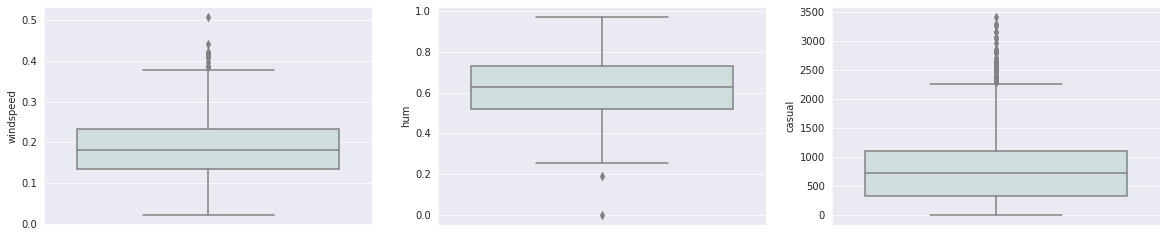

In [25]:
sns.set_palette("bone_r")
f , axes = plt.subplots(nrows=1, ncols=3, figsize = (20,4))
sns.set_style("darkgrid")

fig1 = sns.boxplot(y= df.windspeed, ax = axes[0] )
fig2 = sns.boxplot(y= df.hum, ax = axes[1] )
fig3 = sns.boxplot(y=df.casual, ax = axes[2] )
plt.show()

In [26]:
df.windspeed.quantile(.25)

0.13495

In [27]:
IQR = df.windspeed.quantile(.75) - df.windspeed.quantile(.25)
IQR

0.0982645

In [28]:
whisker  = (df.windspeed.quantile(.75) - df.windspeed.quantile(.25)) * 1.5
whisker


0.14739675000000002

In [29]:
lower_range = df.windspeed.quantile(.25) - whisker 
upper_range = df.windspeed.quantile(.75) + whisker 

In [30]:
df.query('windspeed > @upper_range | windspeed < @lower_range' )

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
93,94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
94,95,2011-04-05,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
382,383,2012-01-18,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
420,421,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732
432,433,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382
433,434,2012-03-09,1,1,3,0,5,1,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569


In [31]:
def findoutliers(col):
  whisker  = (col.quantile(.75) - col.quantile(.25)) * 1.5
  lower_range = col.quantile(.25) - whisker 
  upper_range = col.quantile(.75) + whisker
  return df.query('@col > @upper_range | @col < @lower_range')

In [32]:
findoutliers(df.hum)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623


In [33]:
cas = findoutliers(df.casual)

In [34]:
cas

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
148,149,2011-05-29,2,0,5,0,0,0,1,0.667500,0.615550,0.818750,0.213938,2355,2433,4788
183,184,2011-07-03,3,0,7,0,0,0,2,0.716667,0.668575,0.682500,0.228858,2282,2367,4649
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043
196,197,2011-07-16,3,0,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342,2418,3505,5923
246,247,2011-09-04,3,0,9,0,0,0,1,0.709167,0.665429,0.742083,0.206467,2521,2419,4940
281,282,2011-10-09,4,0,10,0,0,0,1,0.540833,0.523983,0.727500,0.063450,2397,3114,5511
441,442,2012-03-17,1,1,3,0,6,0,2,0.514167,0.505046,0.755833,0.110704,3155,4681,7836
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
455,456,2012-03-31,2,1,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617,2301,3934,6235
456,457,2012-04-01,2,1,4,0,0,0,2,0.425833,0.417287,0.676250,0.172267,2347,3694,6041


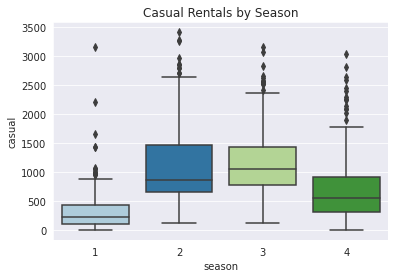

In [35]:
sns.set_palette("Paired")
ax = sns.boxplot(x="season", y ="casual",data = df)
plt.title('Casual Rentals by Season')
plt.show()

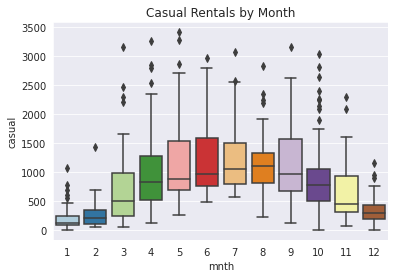

In [36]:
sns.set_palette("Paired")
ax = sns.boxplot(x="mnth", y ="casual",data = df)
plt.title('Casual Rentals by Month')
plt.show()

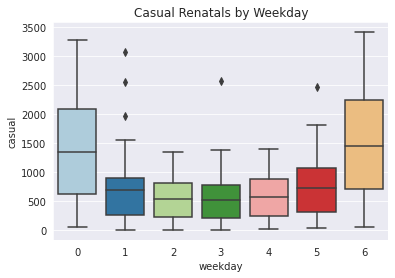

In [37]:
sns.set_palette("Paired")
ax = sns.boxplot(x="weekday", y ="casual",data = df)
plt.title('Casual Renatals by Weekday')
plt.show()

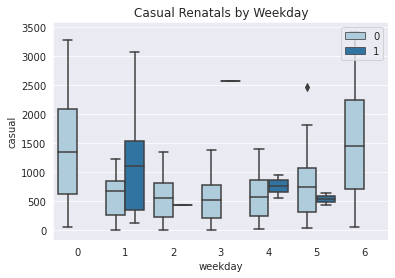

In [44]:
sns.set_palette("Paired")
ax = sns.boxplot(x="weekday", y ="casual", hue ='holiday',data = df)
plt.title('Casual Renatals by Weekday')
plt.legend(loc='upper right')
plt.show()